# PROJECT _ NEURAL NETWORKS

In [30]:
import h5py
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import tensorflow as tf
import random
random.seed(0)

Loading the SVHN Data set

In [31]:
h5f = h5py.File('SVHN_single_grey1.h5','r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

Checking the train/test/val splits

In [32]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

The sets contain RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using below function.

Label: 7


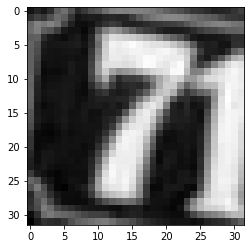

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[5000]))
plt.imshow(X_train[5000], cmap='gray')

In [34]:
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)
print("Validation set:", X_val.shape, y_val.shape)

Training set: (42000, 32, 32) (42000,)
Test set: (18000, 32, 32) (18000,)
Validation set: (60000, 32, 32) (60000,)


Reshaping the data

In [35]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)

Normalizing the data

In [36]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

Shape of data and number of images

In [21]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (42000, 32, 32, 1)
Images in X_train: 42000
Images in X_test: 18000
Max value in X_train: 0.9999
Min value in X_train: 0.0


One hot encoding the class

In [37]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0]) 

Shape of y_train: (42000, 10)
One value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Initializing sequential network

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

Compiling and fitting the model

In [39]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="Adam")

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 145us/sample - loss: 2.2826 - acc: 0.1252 - val_loss: 2.2100 - val_acc: 0.1748
Epoch 2/100
42000/42000 [==============================] - 8s 192us/sample - loss: 2.1109 - acc: 0.2089 - val_loss: 2.0362 - val_acc: 0.2379
Epoch 3/100
42000/42000 [==============================] - 9s 220us/sample - loss: 2.0222 - acc: 0.2378 - val_loss: 1.9974 - val_acc: 0.2472
Epoch 4/100
42000/42000 [==============================] - 7s 167us/sample - loss: 1.9964 - acc: 0.2459 - val_loss: 1.9818 - val_acc: 0.2538
Epoch 5/100
42000/42000 [==============================] - 7s 177us/sample - loss: 1.9800 - acc: 0.2493 - val_loss: 1.9618 - val_acc: 0.2590
Epoch 6/100
42000/42000 [==============================] - 9s 216us/sample - loss: 1.9717 - acc: 0.2498 - val_loss: 1.9806 - val_acc: 0.2428
Epoch 7/100
42000/42000 [==============================] - 7s 159us/sample - loss: 1.9616 - acc: 0.2638 

Loss and accuracy

In [40]:
model.evaluate(X_test, y_test)

18000/18000 [==============================] - 0s 21us/sample - loss: 1.9146 - acc: 0.2610


[1.9145975242190891, 0.261]